---

## GHZ States

6 October 2024
<br>
Burton Rosenberg

---


In [1]:

import qiskit
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, Pauli 
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector
from IPython.display import display, Math, HTML
import time, math
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import QuantumRegister, ClassicalRegister
from qiskit.circuit import Parameter

print(f'\nqiskit version: {qiskit.version.get_version_info()}\n')


qiskit version: 1.1.2



We have looked at the Bell states,

\begin{eqnarray}
\Phi^+ &=& |00\rangle + |11\rangle \\
\Phi^- &=& |00\rangle - |11\rangle \\
\Psi^+ &=& |01\rangle + |10\rangle \\
\Psi^- &=& |01\rangle - |10\rangle \\
\end{eqnarray}

Which are maximally entangled states, which form a basis for a space of maximally entangeled qubit pairs.

Here we look to extend beyond 2 qubits, and to look at some interference phenomena. In particular, by adding a single
qubit that is the xor of all the other qubits, upon a second Hadamard transformation, the interference pattern caused by this
additional qubit causes all the qubits to become uniformaly entangled.


In the following circuit, the sampling superposition is taged with the parity of $i$,
$$
\sum_i |i,\oplus \,i\,\rangle
$$
The Hadamard shows that all bits are now maximally entangled. 

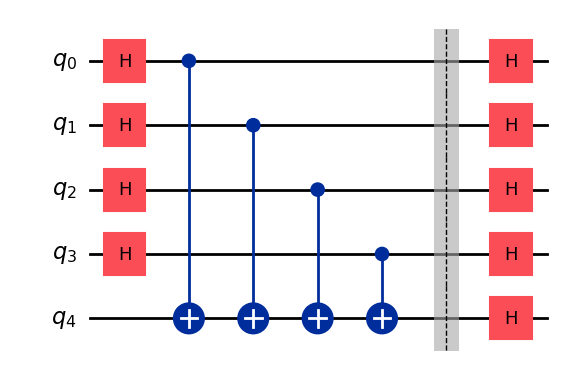

'before the barrier'

<IPython.core.display.Latex object>

'after the barrier'

<IPython.core.display.Latex object>

In [17]:
n = 5

def xorish(n, omit_h=-1):
    qc = QuantumCircuit(n)
    #qc.x(n-1)
    #qc.h(n-1)
    for i in range(n-1):
        qc.h(i)
        qc.cx(i,n-1)
    sv = Statevector(qc)
    qc.barrier()
    for i in range(n):
        if omit_h!=i:
            qc.h(i)        
    return (qc,sv, Statevector(qc))

qc, sv1, sv2  = xorish(n)
display(qc.draw('mpl'))
display('before the barrier',sv1.draw('latex'))
display('after the barrier',sv2.draw('latex'))

qc.measure_all()
basic_sim = BasicSimulator()
job = basic_sim.run(qc,shots=1024)
result = job.result()
display(HTML('<tt>Sampling the wave function:  '+ f'{result.get_counts()}' +'</tt>'))


----

The $H$ on any particular wire does not matter to the entanglement of the remaining qubits.

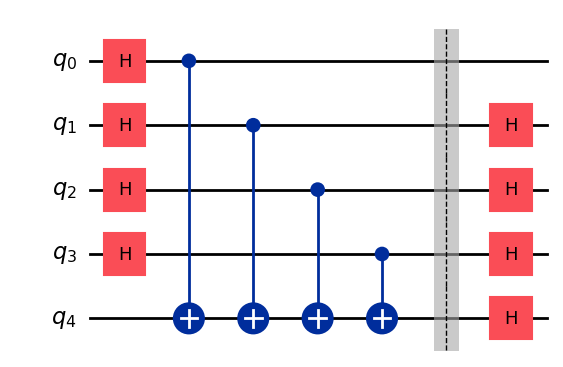

'before the barrier'

<IPython.core.display.Latex object>

'after the barrier'

<IPython.core.display.Latex object>

In [19]:
qc, sv1, sv2  = xorish(n,omit_h=0)
display(qc.draw('mpl'))
display('before the barrier',sv1.draw('latex'))
display('after the barrier',sv2.draw('latex'))

qc.measure_all()
basic_sim = BasicSimulator()
job = basic_sim.run(qc,shots=1024)
result = job.result()
display(HTML('<tt>Sampling the wave function:  '+ f'{result.get_counts()}' +'</tt>'))

----

And if there are blocks of such entanglement, they act by the tensor product of entangled bits.

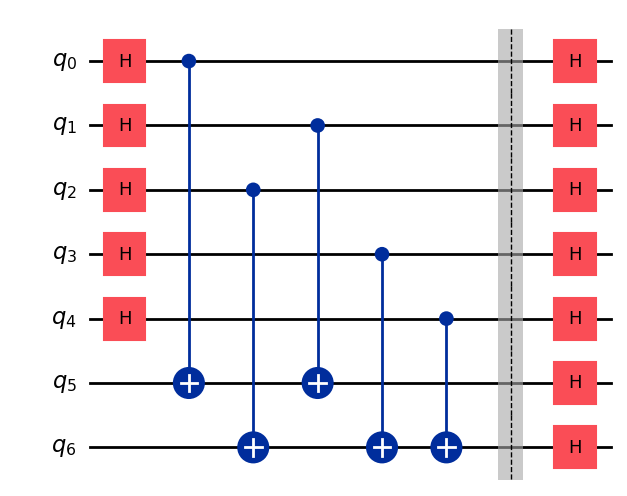

'before the barrier'

<IPython.core.display.Latex object>

'after the barrier'

<IPython.core.display.Latex object>

In [15]:
n = 7

def two_xorish(n, show_circuit=False):
    qc = QuantumCircuit(n)
    m = (n-2)//2 
    for i in range(n-2):
        qc.h(i)
        if i<m:
            qc.cx(i,n-2)
        else:
            qc.cx(i,n-1)
    sv = Statevector(qc)
    qc.barrier()
    for i in range(n):
        qc.h(i)        
    return (qc,sv, Statevector(qc))

qc, sv1, sv2  = two_xorish(n)
display(qc.draw('mpl'))
display('before the barrier',sv1.draw('latex'))
display('after the barrier',sv2.draw('latex'))

qc.measure_all()
basic_sim = BasicSimulator()
job = basic_sim.run(qc,shots=1024)
result = job.result()
display(HTML('<tt>Sampling the wave function:  '+ f'{result.get_counts()}' +'</tt>'))


### Exercise A

Find another way to create a 3 qubit GHZ state.

Does this generalize to $n$ qubits?

In [ ]:
### Exercise A



### Exercise B

There are four entangled bit states on two qubits,

\begin{eqnarray}
\Phi^+ &=& |00\rangle + |11\rangle \\
\Phi^- &=& |00\rangle - |11\rangle \\
\Psi^+ &=& |01\rangle + |10\rangle \\
\Psi^- &=& |01\rangle - |10\rangle \\
\end{eqnarray}

Our multientanglements were just of similar form to $\Phi^+$. Give constructions for the other three.

In [ ]:
### Exercise B




### END